In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Log Normalization - Wine

In [2]:
# Proline: lượng axit amin là thành phần cấu tạo của hầu hết các loại protein, đặc biệt là collagen
# Ash: Hàm lượng tro trong rượu vang thường nằm trong khoảng từ 1,3 đến 3,5 mg / l
# Proanthocyanidins: đóng một vai trò quan trọng trong rượu vang; với khả năng liên kết các protein

In [3]:
wine = pd.read_csv('data/wine_types.csv')
wine.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.shape

(178, 14)

In [5]:
wine_sub = wine[['Alcohol', 'Proline', 'Proanthocyanins', 'Ash']]
wine_sub.head()

,Alcohol,Proline,Proanthocyanins,Ash
0,14.23,1065,2.29,2.43
1,13.20,1050,1.28,2.14
2,13.16,1185,2.81,2.67
3,14.37,1480,2.18,2.50
4,13.24,735,1.82,2.87


In [6]:
print("Phương sai của Alcohol:", wine_sub["Alcohol"].var())
print("Phương sai của Proline:", wine_sub["Proline"].var()) # variance của biến Proline rất cao

Phương sai của Alcohol: 0.6590623278105759
Phương sai của Proline: 99166.71735542436


In [7]:
print('Độ xiên của Proline:', wine_sub["Proline"].skew()) # lệch phải

Độ xiên của Proline: 0.7678217813897322


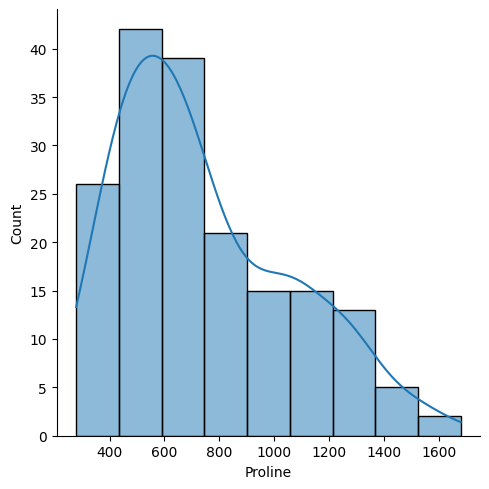

In [8]:
sns.displot(data=wine_sub, x='Proline', kde=True); # không tuân theo luật phân phối chuẩn; lệch phải

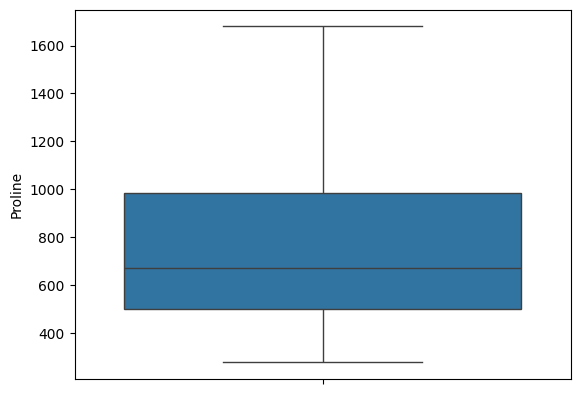

In [9]:
sns.boxplot(data=wine_sub, y='Proline')
plt.show()

In [10]:
wine_sub['Proline'].describe()

count     178.000000
mean      746.893258
std       314.907474
min       278.000000
25%       500.500000
50%       673.500000
75%       985.000000
max      1680.000000
Name: Proline, dtype: float64

## biến Proline có phương sai cao, lệch phải khá lớn
## ==> áp dụng Log Normalization

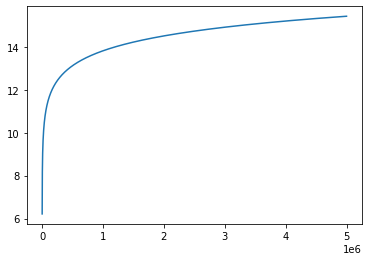

In [11]:
# hàm log
x = np.linspace(0, 5000000, 10000)
y = np.log(x)
plt.plot(x,y)
plt.show()
# scale

In [11]:
wine_sub["Proline_log"] = np.log(wine_sub["Proline"]) # log cơ số e
wine_sub.head()

,Alcohol,Proline,Proanthocyanins,Ash,Proline_log
0,14.23,1065,2.29,2.43,6.970730
1,13.20,1050,1.28,2.14,6.956545
2,13.16,1185,2.81,2.67,7.077498
3,14.37,1480,2.18,2.50,7.299797
4,13.24,735,1.82,2.87,6.599870


In [12]:
print("Phương sai của Proline_log:", wine_sub["Proline_log"].var())
print('Độ xiên của Proline_log:', wine_sub["Proline_log"].skew())

Phương sai của Proline_log: 0.17231366191842012
Độ xiên của Proline_log: 0.08682281513423201


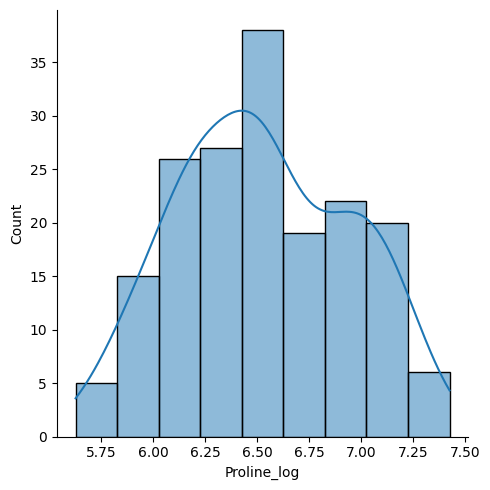

In [13]:
sns.displot(data=wine_sub, x='Proline_log', kde=True);

In [15]:
wine_sub['Proline_log'].describe()

count    178.000000
mean       6.530303
std        0.415107
min        5.627621
25%        6.215606
50%        6.512486
75%        6.892642
max        7.426549
Name: Proline_log, dtype: float64

# Log Normalization - Mammals
- Phân tích thông tin sơ bộ về dữ liệu trên hai thuộc tính BrainWt, BodyWt, xem xét mối quan hệ của 2 thuộc tính này. Trực quan hóa dữ liệu.

In [16]:
df = pd.read_csv("data/mammals.csv", index_col=0)
df.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
1,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
2,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
3,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
4,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
5,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [17]:
df.shape

(62, 11)

In [18]:
df[['BodyWt','BrainWt']].describe()

,BodyWt,BrainWt
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [19]:
df[['BodyWt','BrainWt']].corr() # tương quan mạnh

,BodyWt,BrainWt
BodyWt,1.000000,0.934164
BrainWt,0.934164,1.000000


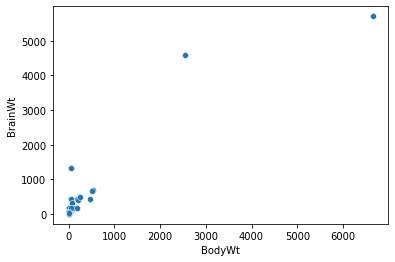

In [20]:
sns.scatterplot(data=df, x='BodyWt', y='BrainWt'); # chưa thấy rõ tương quan

In [21]:
print("Phương sai của BodyWt:", df["BodyWt"].var())
print("Phương sai của BrainWt:", df["BrainWt"].var())

Phương sai của BodyWt: 808485.1278776556
Phương sai của BrainWt: 865418.9104017982


In [22]:
print("Độ xiên của BodyWt:", df["BodyWt"].skew())
print("Độ xiên của BrainWt:", df["BrainWt"].skew())

Độ xiên của BodyWt: 6.563608062833757
Độ xiên của BrainWt: 5.071589456939673


In [23]:
df['BodyWt_log'] = np.log(df.BodyWt)
df['BrainWt_log'] = np.log(df.BrainWt)
df[['BodyWt','BrainWt', 'BodyWt_log','BrainWt_log']].head()

,BodyWt,BrainWt,BodyWt_log,BrainWt_log
1,6654.000,5712.0,8.802973,8.650325
2,1.000,6.6,0.000000,1.887070
3,3.385,44.5,1.219354,3.795489
4,0.920,5.7,-0.083382,1.740466
5,2547.000,4603.0,7.842671,8.434464


In [24]:
df[['BodyWt_log','BrainWt_log']].corr() # tương quan mạnh

,BodyWt_log,BrainWt_log
BodyWt_log,1.000000,0.959575
BrainWt_log,0.959575,1.000000


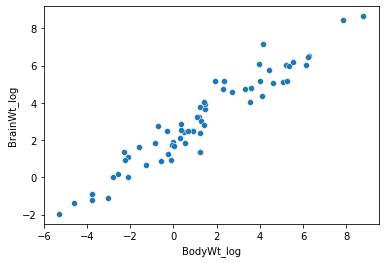

In [25]:
sns.scatterplot(data=df, x='BodyWt_log', y='BrainWt_log');

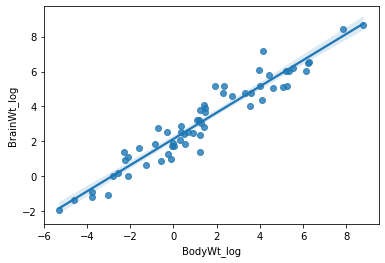

In [26]:
sns.regplot(data=df, x='BodyWt_log', y='BrainWt_log'); # hồi quy tuyến tính
# fit

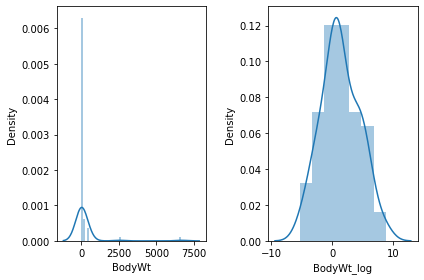

In [27]:
plt.subplot(1,2,1)
sns.distplot(df['BodyWt'])
plt.subplot(1,2,2)
sns.distplot(df['BodyWt_log'])
plt.tight_layout()
plt.show()

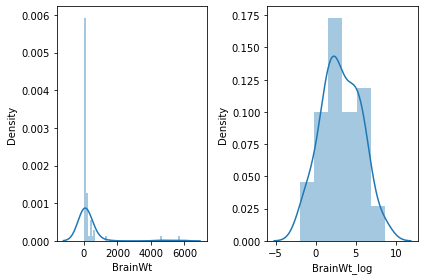

In [28]:
plt.subplot(1,2,1)
sns.distplot(df['BrainWt'])
plt.subplot(1,2,2)
sns.distplot(df['BrainWt_log'])
plt.tight_layout()
plt.show()

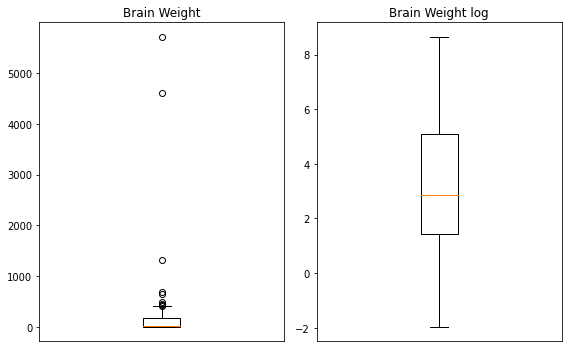

In [29]:
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.boxplot(df['BrainWt'])
plt.title("Brain Weight")
plt.xticks([])
plt.subplot(1, 2, 2)
plt.boxplot(df['BrainWt_log'])
plt.title("Brain Weight log")
plt.xticks([])
plt.tight_layout()
plt.show()